In [1]:
# Bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

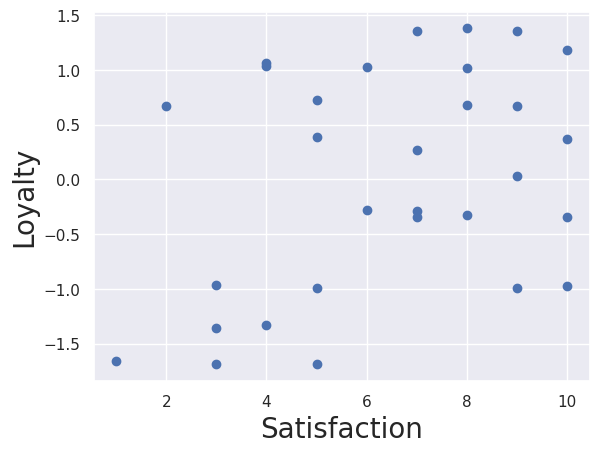

In [2]:
# Dataset
raw_data = pd.read_csv("3.12. Example.csv")
raw_data
plt.scatter(raw_data["Satisfaction"], raw_data["Loyalty"])
plt.xlabel("Satisfaction", fontsize=20)
plt.ylabel("Loyalty", fontsize=20)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

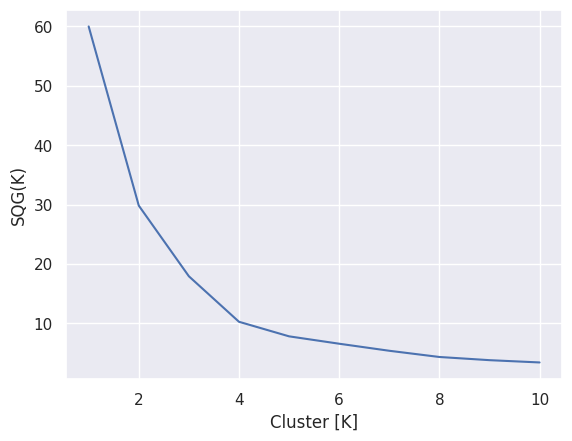

In [3]:
# Padronização do Dataset
from sklearn import preprocessing
x = raw_data.copy()
x_scaled = preprocessing.scale(x)

# Seleção do Número de Clusters (método do cotovelo)
sqg = []
for k in range(1,11):
  kmeans = KMeans(k)
  kmeans.fit(x_scaled)
  sqg.append(kmeans.inertia_)

plt.plot(range(1,11), sqg)
plt.xlabel("Cluster [K]")
plt.ylabel("SQG(K)")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


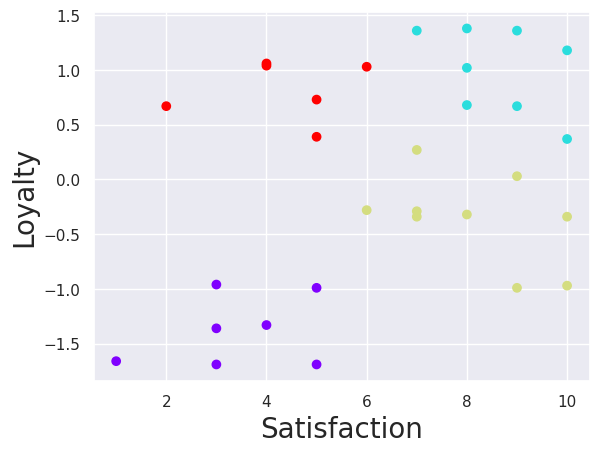

In [4]:
# Agrupamento Usando K-Means
kmeans = KMeans(4)
kmeans.fit(x_scaled)
clusters = kmeans.fit_predict(x_scaled)

processed_data = raw_data.copy()
processed_data["Clusters"] = clusters
processed_data

plt.scatter(processed_data["Satisfaction"], processed_data["Loyalty"], c=processed_data["Clusters"], cmap="rainbow")
plt.xlabel("Satisfaction", fontsize=20)
plt.ylabel("Loyalty", fontsize=20)
plt.show()